# Machine Learning for predicting the number of wins a baseball team will attain

In [1]:
#data analysis and wrangling
import pandas as pd
import numpy as np

#visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

#model developing-machine learning
import sklearn
from scipy.stats import zscore                                                          #for removing the outliers
from sklearn.preprocessing import StandardScaler                                        #for standardizing the input dataset
from sklearn.model_selection import train_test_split                                    #to train the model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error                                 #for reporting purposes

#boosting techniques
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

#saving the model using joblib
import pickle
#for filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#acquiring the data
baseball_df=pd.read_csv("baseball.csv")

In [3]:
#extracting the general information from the dataset
baseball_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [6]:
#checking for the statastical report
baseball_df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [4]:
#previewing the data
baseball_df.sample(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [7]:
#checking if any null values present in the dataset
baseball_df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [40]:
#checking for the statastical report
baseball_df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


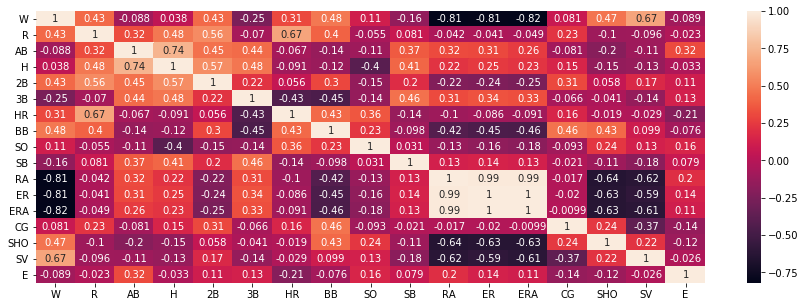

In [10]:
#checking for the correlation
corr_hmap=baseball_df.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr_hmap,annot=True)

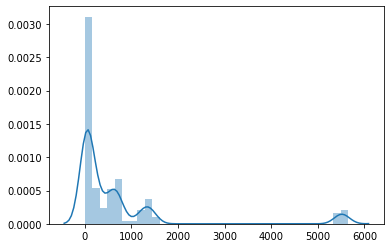

In [11]:
#vizualizing the class
sns.distplot(baseball_df,kde=True)

W         AxesSubplot(0.125,0.799681;0.168478x0.0803191)
R      AxesSubplot(0.327174,0.799681;0.168478x0.0803191)
AB     AxesSubplot(0.529348,0.799681;0.168478x0.0803191)
H      AxesSubplot(0.731522,0.799681;0.168478x0.0803191)
2B        AxesSubplot(0.125,0.703298;0.168478x0.0803191)
3B     AxesSubplot(0.327174,0.703298;0.168478x0.0803191)
HR     AxesSubplot(0.529348,0.703298;0.168478x0.0803191)
BB     AxesSubplot(0.731522,0.703298;0.168478x0.0803191)
SO        AxesSubplot(0.125,0.606915;0.168478x0.0803191)
SB     AxesSubplot(0.327174,0.606915;0.168478x0.0803191)
RA     AxesSubplot(0.529348,0.606915;0.168478x0.0803191)
ER     AxesSubplot(0.731522,0.606915;0.168478x0.0803191)
ERA       AxesSubplot(0.125,0.510532;0.168478x0.0803191)
CG     AxesSubplot(0.327174,0.510532;0.168478x0.0803191)
SHO    AxesSubplot(0.529348,0.510532;0.168478x0.0803191)
SV     AxesSubplot(0.731522,0.510532;0.168478x0.0803191)
E         AxesSubplot(0.125,0.414149;0.168478x0.0803191)
dtype: object

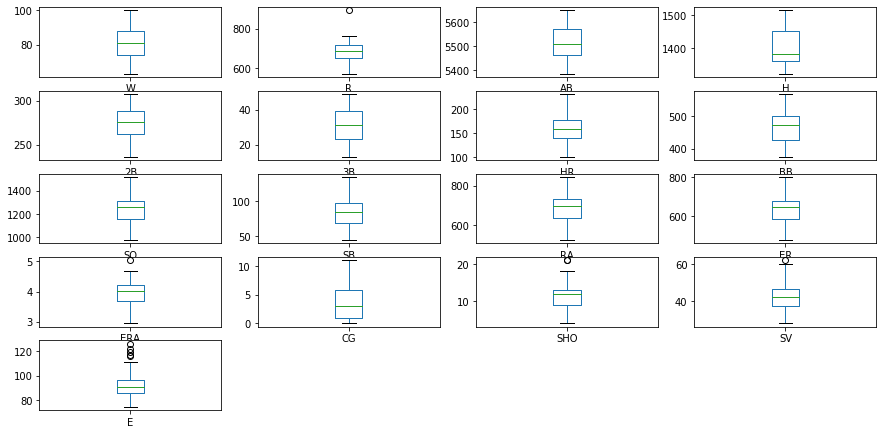

In [12]:
#checking for the outliers
baseball_df.plot(kind='box',subplots=True,layout=(8,4),figsize=(15,12))

In [21]:
baseball_df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

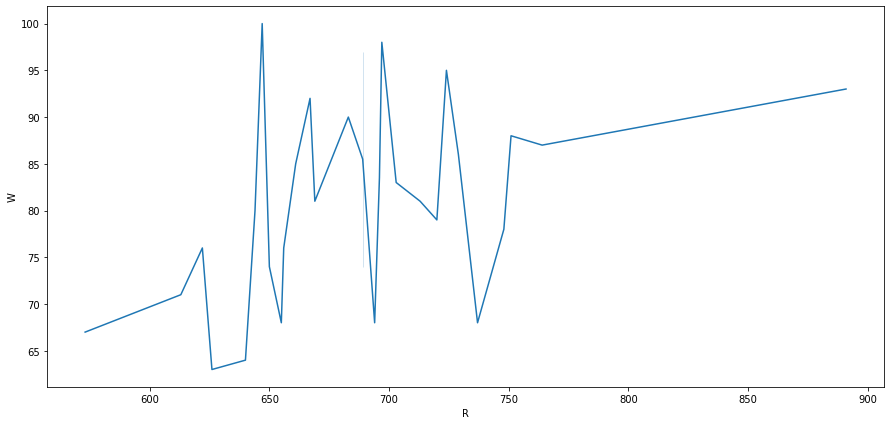

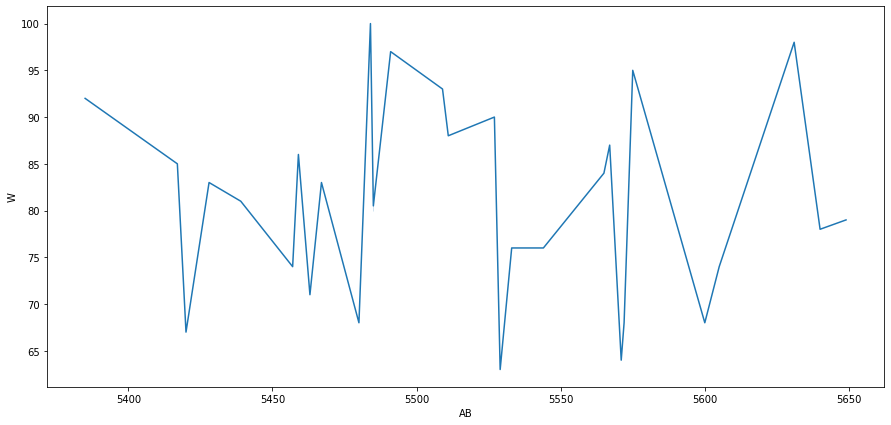

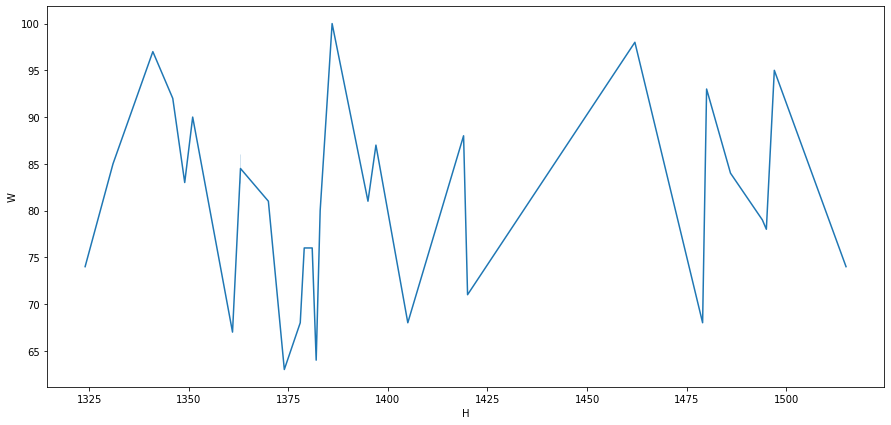

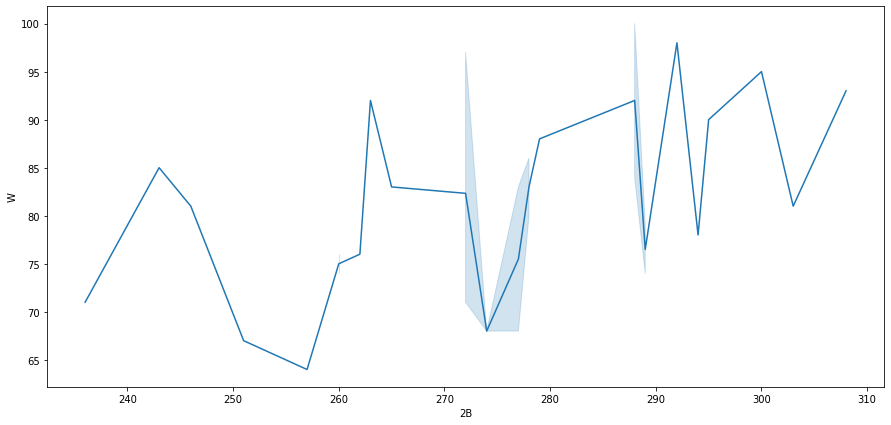

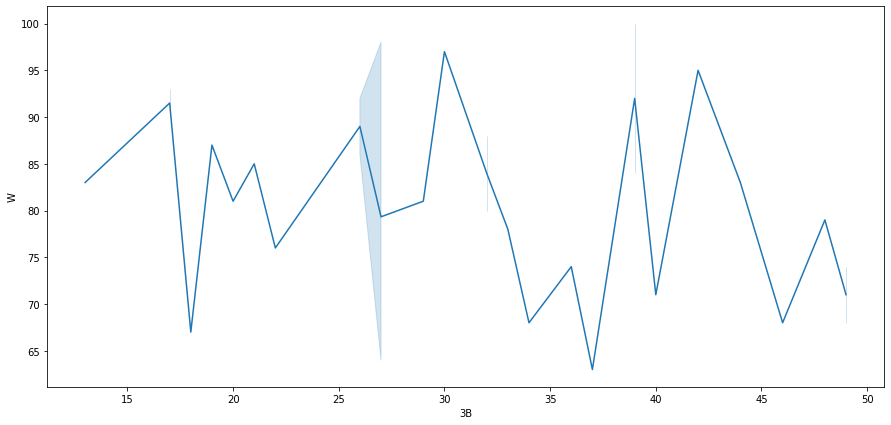

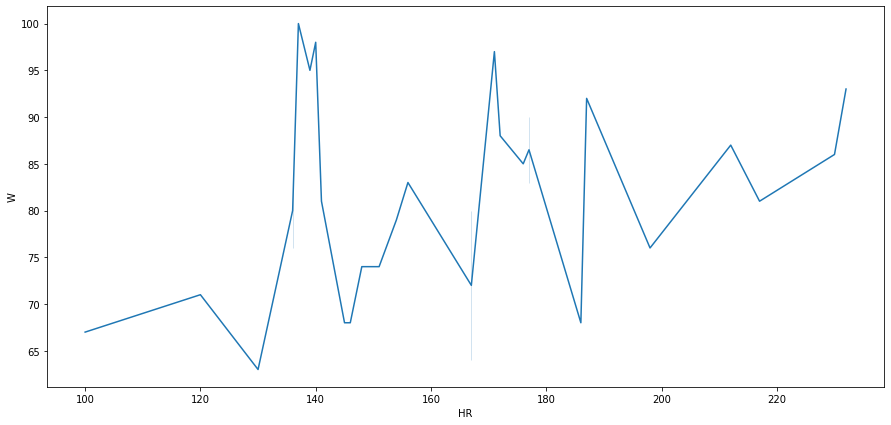

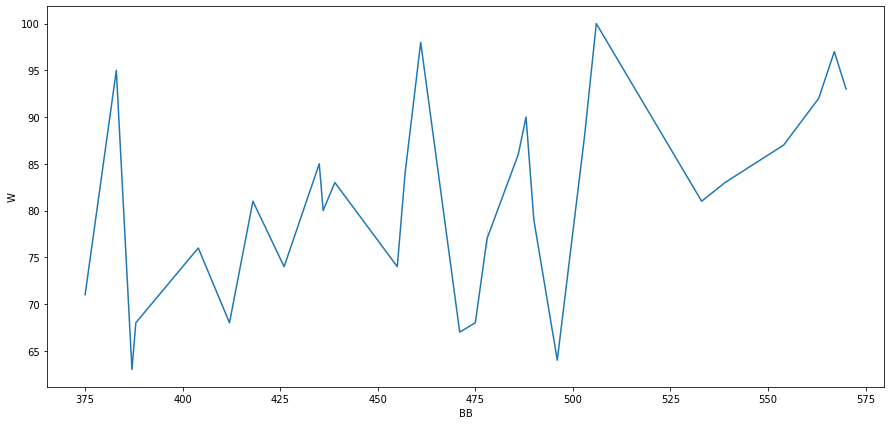

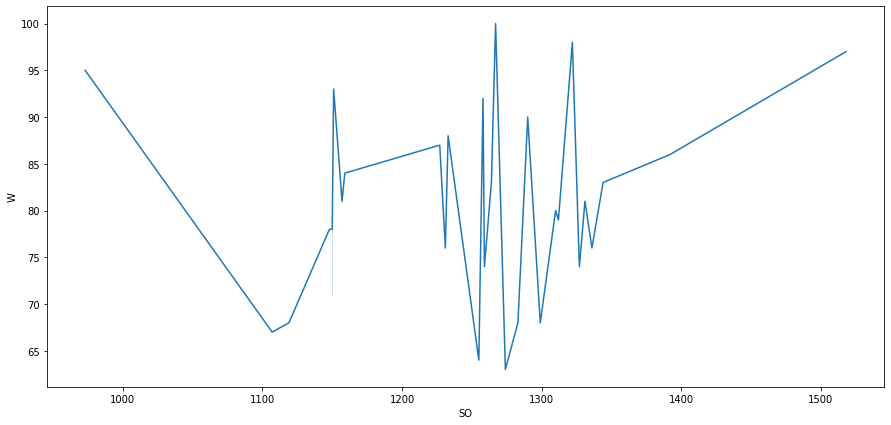

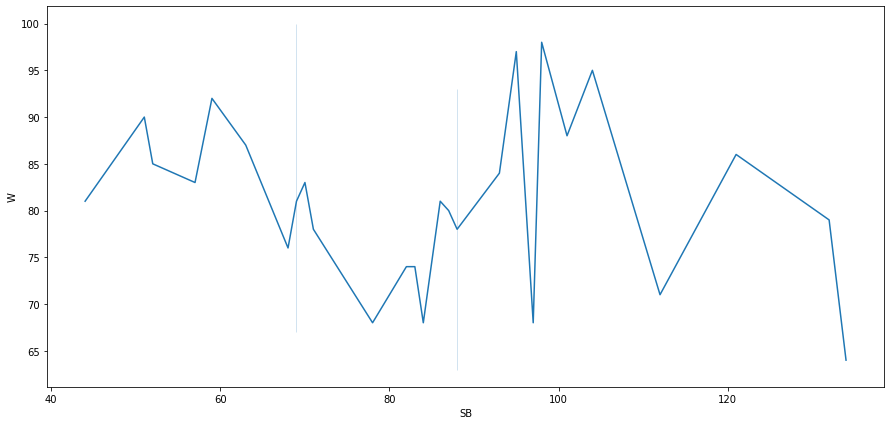

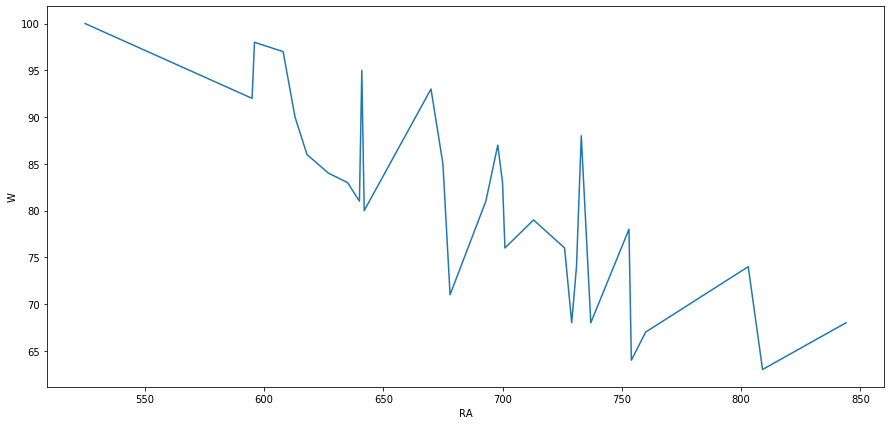

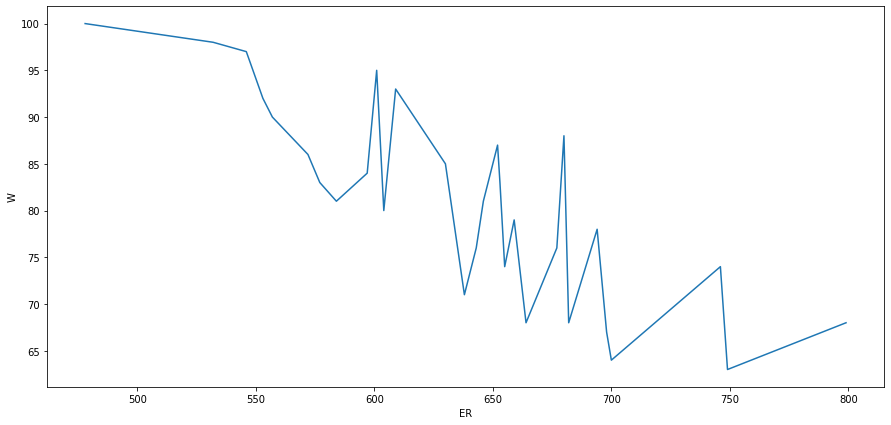

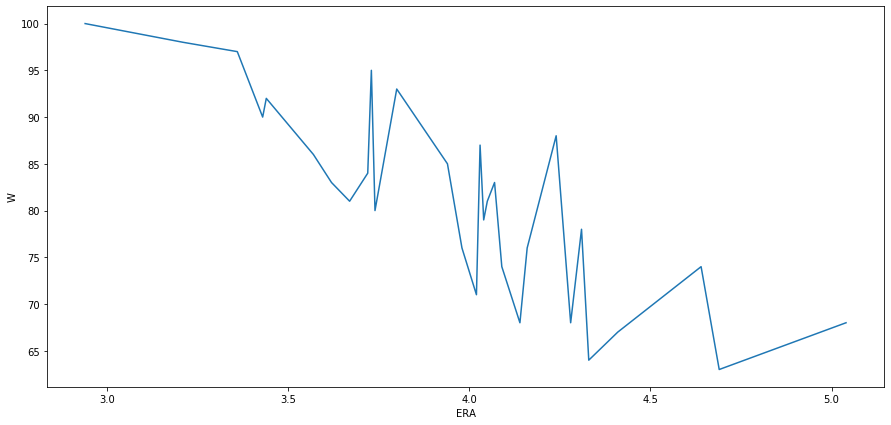

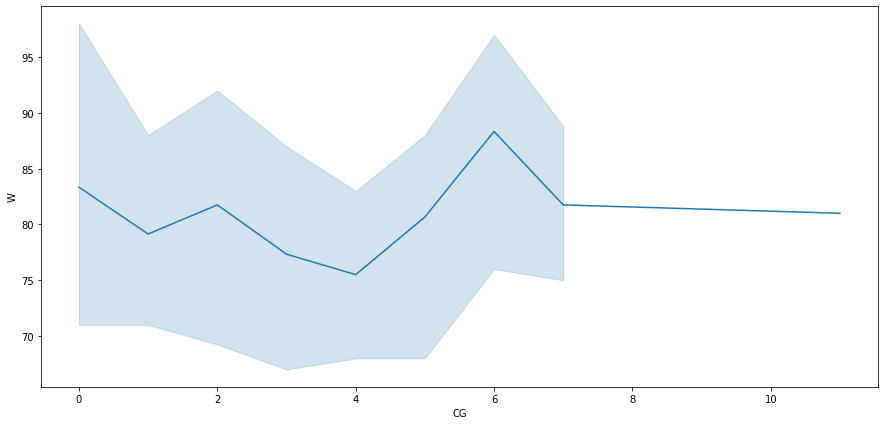

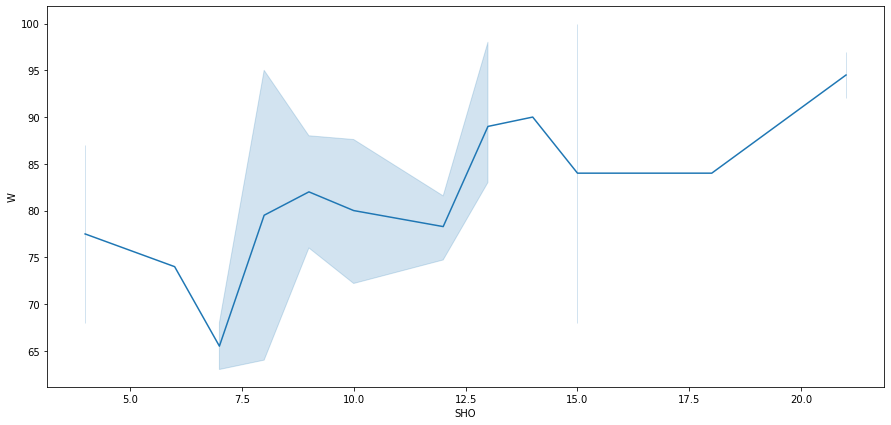

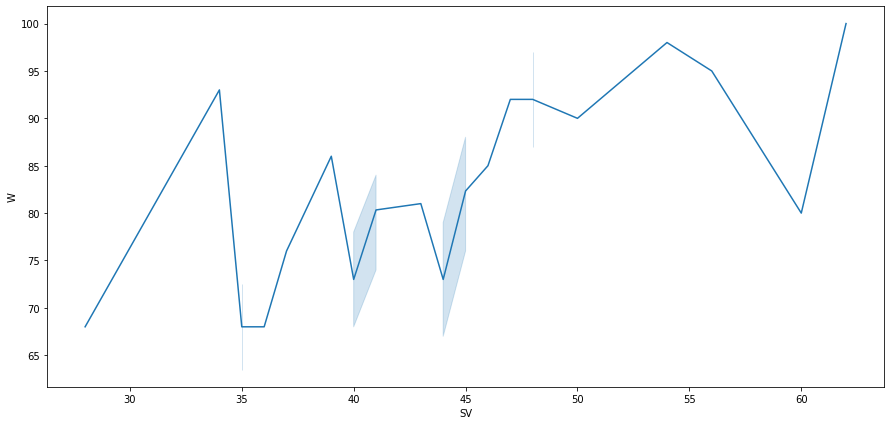

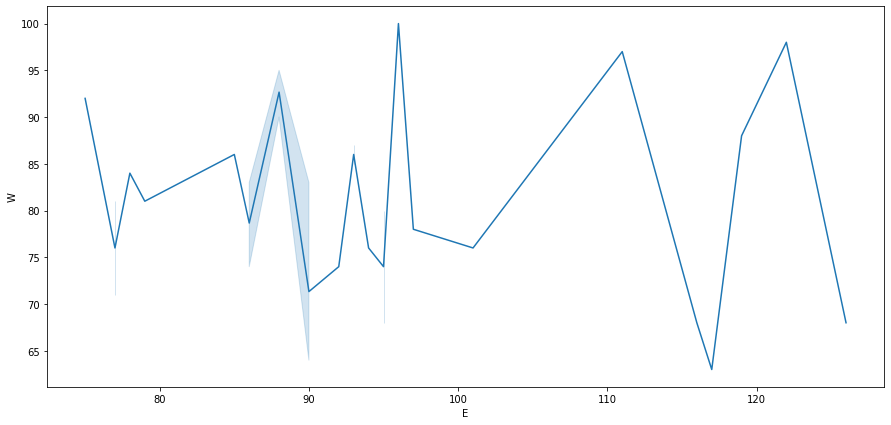

In [35]:
#printing different plot w.r.t Win column
data_columns=['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']
for i in range(len(data_columns)):
    fig,ax=plt.subplots(figsize=(15,7))
    sns.lineplot(data=baseball_df,x=data_columns[i],y='W',markers=True)

In [36]:
#checking the skewness before removing the outliers
baseball_df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [37]:
#removing outliers
z_score=np.abs(zscore(baseball_df))
print(baseball_df.shape)
baseball_df_final=baseball_df.loc[(z_score<3).all(axis=1)]
print(baseball_df_final.shape)

(30, 17)
(29, 17)


In [38]:
#checking the skewness before removing the outliers
print(baseball_df_final.skew())

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64


In [42]:
#Now separating input and output variable
x=baseball_df_final.drop(['W'],axis=1)
y=baseball_df_final['W']
print(x.shape)
print(y.shape)

(29, 16)
(29,)


In [43]:
#standardizing the input dataset 
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.95939835,  0.83008422,  1.73830631,  1.55653766,  1.01084549,
        -0.76586314, -1.53635899, -2.72762331,  0.9059529 , -0.66451353,
        -0.51114812, -0.51138828, -0.50148589, -0.81326172,  1.64315663,
        -0.47109143],
       [ 0.33114717, -0.70283074, -0.93869788,  0.20117132,  1.20891656,
        -0.18138864, -0.49502051,  0.12189552, -0.58531515,  0.15463823,
         0.23216082,  0.23895226, -0.50148589,  0.15929869,  0.21100645,
        -0.61489829],
       [-0.27466646, -1.10025314, -0.10665604,  1.73332457, -0.2766165 ,
        -0.69710144,  1.25294051, -0.9258657 ,  0.11645805, -0.67839746,
        -0.75415297, -0.64380131,  2.85461197, -0.32698152, -0.70036184,
        -1.1182223 ],
       [-1.32923093,  0.23395062, -0.35988616, -0.8006212 , -0.47468758,
        -0.8690057 , -1.14585706, -0.20124579, -0.6730368 ,  0.16852216,
         0.08921679,  0.04033271,  1.36301292, -0.57012162, -0.83055731,
         0.46365315],
       [ 0.17408438,  1.25589393,  2

In [44]:
#Machine Learning Models
models=[]
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', tree.DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))

In [49]:
r2_scr_results = []
names = []
for name, model in models:
    print(name)
    max_r2_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.10)
        model_name=model
        model_name.fit(x_train,y_train)
        y_pred=model_name.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("random state: ",r_state," accuracy score: ",r2_scr)
        if r2_scr>max_r2_score:
            max_r2_score=r2_scr      
            final_r_state=r_state
    r2_scr_results.append(max_r2_score*100)
    print()
    print("max accuracy score at random state:",final_r_state," for the model ",name," is: ",max_r2_score)
    print()
    print()

LR
random state:  42  accuracy score:  0.7640191908438704
random state:  43  accuracy score:  -0.5651184512453977
random state:  44  accuracy score:  0.431455962779007
random state:  45  accuracy score:  -0.2750144050110066
random state:  46  accuracy score:  0.6753503809592682
random state:  47  accuracy score:  0.7259807646917045
random state:  48  accuracy score:  -3.162246539708958
random state:  49  accuracy score:  -2.899570811752237
random state:  50  accuracy score:  0.0805341928167862
random state:  51  accuracy score:  0.9275051036587135
random state:  52  accuracy score:  0.6842540161297022
random state:  53  accuracy score:  0.9457609635945586
random state:  54  accuracy score:  -8.932846316950114
random state:  55  accuracy score:  0.2072433709715995
random state:  56  accuracy score:  0.5369902712719444
random state:  57  accuracy score:  -5.788043129276554
random state:  58  accuracy score:  0.07050824928489574
random state:  59  accuracy score:  0.23735775553005822
rand

random state:  42  accuracy score:  -1.8983572895277208
random state:  43  accuracy score:  0.4441964285714286
random state:  44  accuracy score:  -1.5384615384615383
random state:  45  accuracy score:  -7.035031847133757
random state:  46  accuracy score:  -1.1774193548387095
random state:  47  accuracy score:  -1.684713375796178
random state:  48  accuracy score:  0.328125
random state:  49  accuracy score:  -28.03846153846154
random state:  50  accuracy score:  -4.328947368421053
random state:  51  accuracy score:  -3.5085959885386817
random state:  52  accuracy score:  -4.653846153846153
random state:  53  accuracy score:  -0.7585034013605443
random state:  54  accuracy score:  -178.57142857142856
random state:  55  accuracy score:  -4.009174311926605
random state:  56  accuracy score:  -0.8711340206185565
random state:  57  accuracy score:  -4.973214285714286
random state:  58  accuracy score:  -9.224890829694322
random state:  59  accuracy score:  -4.071428571428571
random state:

In [51]:
#cross_val of the models
results = []
names = []
cvs=[]
for name, model in models:
    cv_result=cross_val_score(model, x_train, y_train, cv=2, scoring="r2")
    results.append(cv_result)
    names.append(name)
    print("Model name: ",name)
    print("Cross Validation Score(Mean): ",cv_result.mean())
    cvs.append(cv_result.mean()*100)
    print("Cross Validation Score(Std): ",cv_result.std())
    print()

Model name:  LR
Cross Validation Score(Mean):  -2.138163355821783
Cross Validation Score(Std):  1.809761527855474

Model name:  KNN
Cross Validation Score(Mean):  -0.6488632831884338
Cross Validation Score(Std):  0.37522016519321943

Model name:  DT
Cross Validation Score(Mean):  -0.49497574524682775
Cross Validation Score(Std):  0.06515522062648738

Model name:  GNB
Cross Validation Score(Mean):  -1.0118376043338024
Cross Validation Score(Std):  1.5567311945617335



In [52]:
#checking for the best results
result=pd.DataFrame({'Model':models,'Accuracy_Score':r2_scr_results, 'Cross_Validation_Score':cvs})
result

,Model,Accuracy_Score,Cross_Validation_Score
0,"(LR, LinearRegression(copy_X=True, fit_interce...",94.576096,-213.816336
1,"(KNN, KNeighborsClassifier(algorithm='auto', l...",77.977839,-64.886328
2,"(DT, DecisionTreeClassifier(ccp_alpha=0.0, cla...",87.982625,-49.497575
3,"(GNB, GaussianNB(priors=None, var_smoothing=1e...",62.500000,-101.183760


In [54]:
#Choosing the Best Model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=53,test_size=0.10)
model_name=tree.DecisionTreeClassifier()
model_name.fit(x_train,y_train)
y_pred_model=model_name.predict(x_test)
r2_scr=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("r2 score: ",r2_scr)
print("mean squared error: ",mse)
print(y_pred_model)

r2 score:  -0.5170068027210883
mean squared error:  148.66666666666666
[79 81 74]


In [56]:
#saving the model as pickle in a file
pickle.dump(model_name,open('lr_baseball_data.pkl','wb'))

In [57]:
#loading the model for testing
loaded_model=pickle.load(open('lr_baseball_data.pkl','rb'))
loaded_model.predict(x_test)

array([79, 81, 74], dtype=int64)